In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv", parse_dates = ["Datetime"])
test_data = pd.read_csv("test.csv", parse_dates = ["Datetime"])
samplesubmission = pd.read_csv("SampleSubmission.csv")
train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [3]:
test_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [4]:
samplesubmission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


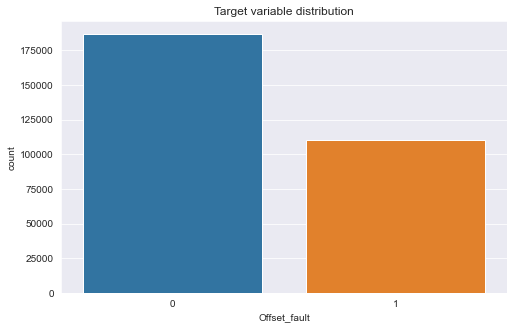

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train_data["Offset_fault"])
plt.title('Target variable distribution')
plt.show()

Text(0.5, 1.0, 'Target variable distribution')

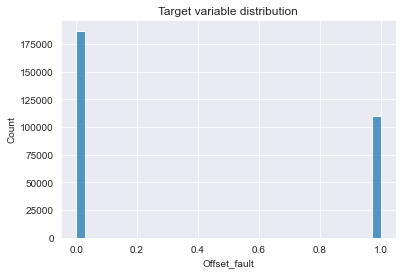

In [6]:
sns.histplot(train_data["Offset_fault"])
plt.title("Target variable distribution")

In [7]:
train_data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [8]:
train_data.isnull().sum().any(), test_data.isnull().sum().any()

(True, True)

In [9]:
train_data.fillna(0)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...,...,...
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0


In [10]:
train_data.duplicated().any(), test_data.duplicated().any()

(False, False)

In [11]:
train_data['Datetime_day'] = train_data.Datetime.dt.day
train_data['Datetime_month'] = train_data.Datetime.dt.month
train_data['Datetime_year'] = train_data.Datetime.dt.year
train_data['Datetime_hour'] = train_data.Datetime.dt.hour
train_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


In [12]:
test_data['Datetime_day'] = test_data.Datetime.dt.day
test_data['Datetime_month'] = test_data.Datetime.dt.month
test_data['Datetime_year'] = test_data.Datetime.dt.year
test_data['Datetime_hour'] = test_data.Datetime.dt.hour
test_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2022-01-28 08:49:41,28,1,2022,8
1,2022-02-16 21:30:17,16,2,2022,21
2,2022-01-24 17:57:18,24,1,2022,17
3,2022-01-31 07:07:09,31,1,2022,7
4,2022-01-31 00:37:05,31,1,2022,0


In [13]:
train_feats = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity", "Datetime_day", "Datetime_month", "Datetime_year", "Datetime_hour"]
X = train_data[train_feats].fillna(0)
y = train_data["Offset_fault"]

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sup_vm = svm.SVC()
sup_vm.fit(X_train, y_train)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
p_pred = sup_vm.predict_proba(X_train)
y_pred = sup_vm.predict(X_test)

In [ ]:
sns.scatterplot(x = train_data["Sensor1_PM2.5"], y = train_data["Offset_fault"])